In [ ]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import math

## Q1: Convolution Function

In [ ]:
img = plt.imread('coin.png')

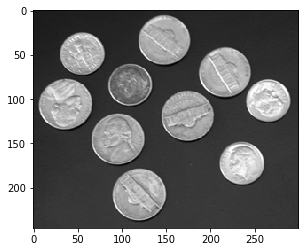

In [ ]:
plt.imshow(img,cmap='gray')

In [ ]:
np.shape(img)

(246, 300)

In [ ]:
kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

In [ ]:
def output_size(length,width,ker_size,pad,stride):
    len_out=math.floor(((length-ker_size)+2*pad)/stride)+1
    width_out=math.floor(((width-ker_size)+2*pad)/stride)+1
    return len_out, width_out

In [ ]:
length=output_size(np.shape(img)[0],np.shape(img)[1],3,0,1)[0]
width=output_size(np.shape(img)[0],np.shape(img)[1],3,0,1)[1]
length,width

(244, 298)

In [ ]:
def Con2D(img,ker,pad=0,stride=1):
    #rows and columns of the input image
    in_row=np.shape(img)[0]
    in_col=np.shape(img)[1]
    ker_rows=np.shape(ker)[0]
    ker_cols=np.shape(ker)[1]
    #find the rows and columns of the output image
    row=output_size(in_row,in_col,ker_rows,pad,stride)[0]
    col=output_size(in_row,in_col,ker_cols,pad,stride)[1]
    #creating a null matrix of the size of output image
    conv_img=np.zeros(shape=(row,col))
    for x in range(row):
        for y in range(col):
            # Get the elements to convolve with the kernel
            matrix=img[x:x+ker_rows, y:y+ker_cols]
            # find sum of the product of corresponding element of image and kernel
            sum_of_prod=0
            for r in range(ker_rows):
                for c in range(ker_cols):
                    sum_of_prod=sum_of_prod+ (matrix[r,c]*ker[r,c])

            conv_img[x, y] = sum_of_prod
    return conv_img

In [ ]:
img_sharp = Con2D(img=np.array(img), ker=kernel)

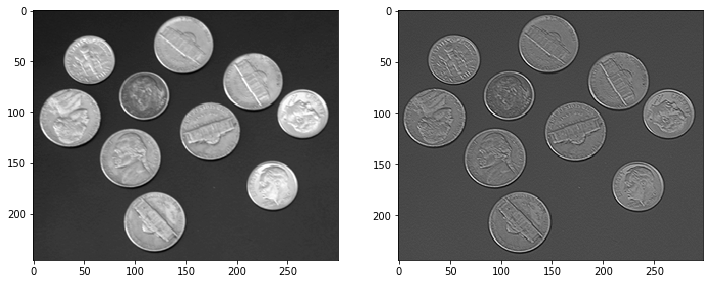

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(img_sharp, cmap='gray')

## Q2:Non linear filter

In [ ]:
img2 = plt.imread('coin.png')

In [ ]:
test_list = [4, 5, 8, 9, 10, 17,16]

# printing list
print("The original list : " + str(test_list))

# Median of list
# Using loop + "~" operator
test_list.sort()
mid = len(test_list) // 2
res = (test_list[mid] + test_list[~mid]) / 2

# Printing result
print("Median of list is : " + str(res))
test_list[~mid],test_list[mid]

The original list : [4, 5, 8, 9, 10, 17, 16]
Median of list is : 9.0


(9, 9)

In [ ]:
def Nonlinearfilter(img,ker_size,Type='median',pad=0,stride=1):
    #rows and columns of the input image
    in_row=np.shape(img)[0]
    in_col=np.shape(img)[1]
    #find the rows and columns of the output image
    row=output_size(in_row,in_col,ker_size,pad,stride)[0]
    col=output_size(in_row,in_col,ker_size,pad,stride)[1]
    #creating a null matrix of the size of output image
    out_img=np.zeros(shape=(row,col))
    for x in range(row):
        for y in range(col):
            # Get the elements to perform operation
            matrix=img[x:x+ker_size, y:y+ker_size]
            if (Type=='max'):
                # find sum of the median of selected pixels
                out_img[x, y] = np.amax(matrix)
            elif (Type=='min'):
                # find sum of the median of selected pixels
                out_img[x, y] = np.amin(matrix)
            elif (Type=='median'):
                # find sum of the median of selected pixels
                flat_array=matrix.flatten()
                input_list=flat_array.tolist()
                input_list.sort()
                mid = len(input_list) // 2
                list_median = (input_list[mid] + input_list[~mid]) / 2
#
                out_img[x, y] = list_median
    return out_img

In [ ]:
max_img=Nonlinearfilter(img2,3,Type="max")

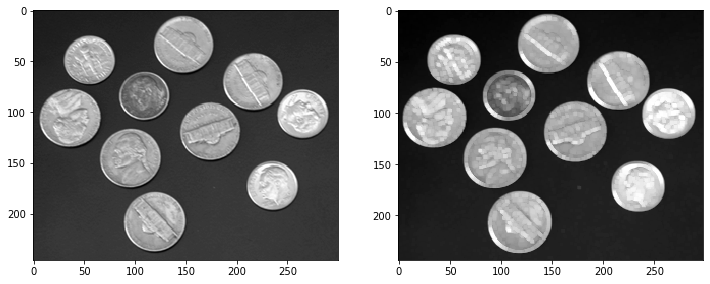

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(max_img, cmap='gray')

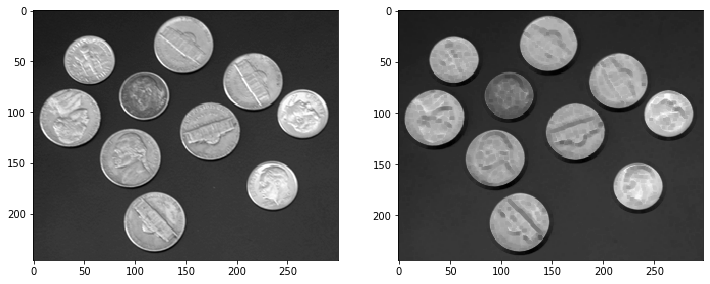

In [ ]:
min_img=Nonlinearfilter(img2,3,Type="min")
_, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(min_img, cmap='gray')

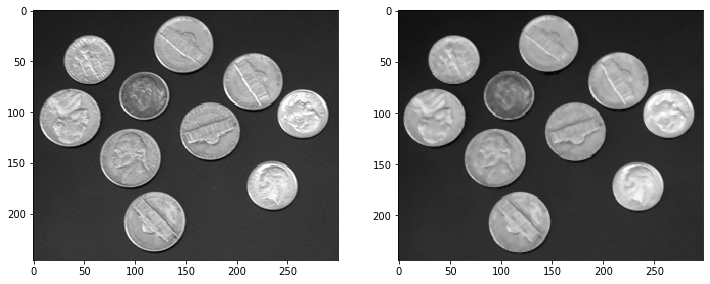

In [ ]:
median_img=Nonlinearfilter(img2,3)
_, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(median_img, cmap='gray')

## Q2:1st and 2nd Derivatives of images

In [ ]:
import cv2
Img = cv2.imread('shape.jpg', 0).astype(np.float64)

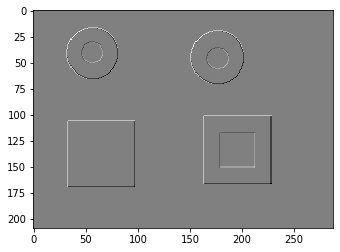

In [ ]:
first_dev = np.array([[0.,0.,0.],
               [0.,-2.,1.],
               [0.,1.,0.]])
F1= Con2D(img=Img, ker=first_dev)
plt.imshow(F1, cmap='gray')

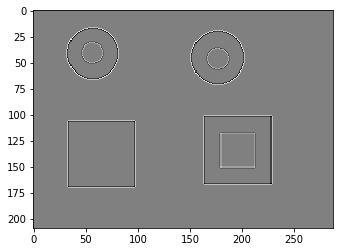

In [ ]:
second_der = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])
F= Con2D(img=Img, ker=second_der)
plt.imshow(F, cmap='gray')

## Q4: Gradients' Magnitude and direction  

In [ ]:
Img = cv2.imread('shape.jpg', 0).astype(np.float64)

#-Derivative x
Kx = np.array([[0.,0.,0.],
                  [-1.0,0.,1.],
                  [0.,0.,0.]])

Fx= Con2D(img=Img, ker=Kx)

#-Derivative y
Ky = np.array([[0.,-1.,0.],
                  [0.,0.,0.],
                  [0.,1.,0.]])

Fy = Con2D(img=Img, ker=Ky)

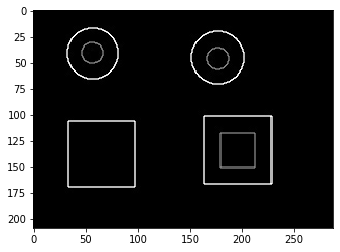

In [ ]:
#--Magnitute
magnitude = np.sqrt(Fx**2 + Fy**2) # G
plt.imshow(magnitude, cmap='gray')

In [ ]:
theta=np.arctan(Fy/Fx)

C:\Users\Abdullah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\Abdullah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


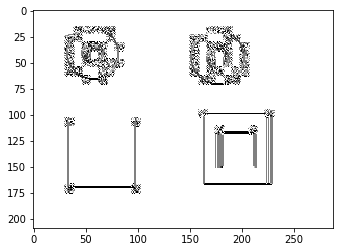

In [ ]:
plt.imshow(theta, cmap='gray')